<a href="https://colab.research.google.com/github/Manvithamk/rainfall_prediction/blob/main/Rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM, Dense
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 rain = pd.read_csv('/content/drive/MyDrive/dataset/weatherAUS.csv')

In [ ]:
7#first 5 rows of the DataFrame
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# returns a tuple representing the dimensions of the DataFrame
rain.shape

(145460, 23)

In [ ]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#if the 25th percentile (25%) for a dataset of rainfall measurements is 50 mm, it means that 25% of the time, the rainfall was 50 mm or less.
rain.describe(exclude=[object])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
rain.describe(include=[object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [ ]:
# Categorical features in Dataset:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Numerical Features in Dataset:

numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
#Cardinality: The number of unique values in each categorical feature is known as cardinality.
for each_feature in categorical_features:
   unique_values = len(rain[each_feature].unique())
   print("Cardinality of {} are: {}".format(each_feature, unique_values))

Cardinality of Date are: 3436
Cardinality of Location are: 49
Cardinality of WindGustDir are: 17
Cardinality of WindDir9am are: 17
Cardinality of WindDir3pm are: 17
Cardinality of RainToday are: 3
Cardinality of RainTomorrow are: 3


In [ ]:
#axis = 1 specifies that you want to drop a column
#inplace = True-changes to be made directly to the DataFrame 'rain' without returning a new DataFrame
rain.drop('Date', axis = 1, inplace = True)

Total count of numerical data:  6
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


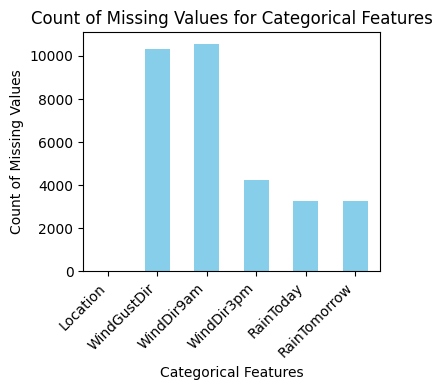

In [ ]:
# Handling Missing values in Categorical Features:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
missing_values_count_categorical = rain[categorical_features].isnull().sum()
print("Total count of numerical data: ",len(missing_values_count_categorical))
print(missing_values_count_categorical)

plt.figure(figsize=(4, 4))  # Adjust figsize as needed
missing_values_count_categorical.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values for Categorical Features')
plt.xlabel('Categorical Features')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Imputing the missing values in categorical features using the most frequent value which is mode:
rain.replace(' ', pd.NA, inplace=True)
categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]
for feature in categorical_features_with_null:
    # Find the first available mode (mode of the first non-null value)
    first_mode = rain[feature].dropna().mode().iloc[0]
    # Replace missing values with the first available mode
    rain[feature].fillna(first_mode, inplace=True)

In [ ]:
#Encoding of Categorical Features:
#Support Vector Machines can’t handle categorical data

def encode_data(feature_name):

    '''

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    mapping_dict = {}

    unique_values = list(rain[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)

    return mapping_dict

In [ ]:
rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

rain['Location'].replace(encode_data('Location'), inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}
{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}
{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}
{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide

Total count of numerical data:  22
Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindGustSpeed    10263
Humidity3pm       4507
Temp3pm           3609
Rainfall          3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
RainToday            0
Location             0
WindDir3pm           0
WindDir9am           0
WindGustDir          0
RainTomorrow         0
dtype: int64


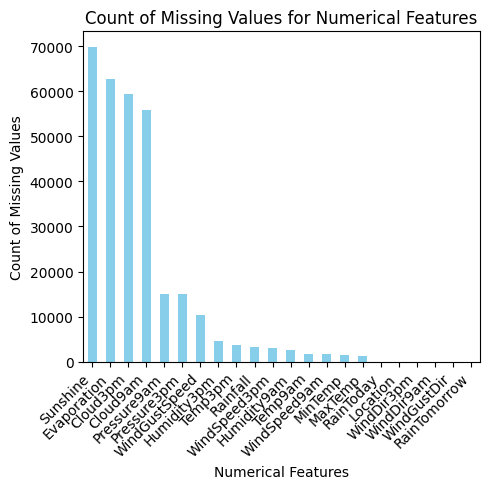

In [ ]:
# Handling Missing values in Numerical features:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
missing_values_count=rain[numerical_features].isnull().sum().sort_values(ascending=False)
print("Total count of numerical data: ",len(numerical_features))
print(missing_values_count)
# Plotting
plt.figure(figsize=(5,5))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values for Numerical Features')
plt.xlabel('Numerical Features')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Mean is sensitive to outliers and median is immune to outliers whereas mode is not
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall',
                          'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm',
                          'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
                          'Sunshine','Cloud3pm','Cloud9am','Humidity3pm']
for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

In [ ]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
# 1. Fill missing numerical values with the mean
rain_mean_filled = rain.copy()
for feature in numerical_features:
    mean_value = rain_mean_filled[feature].()
    rain_mean_filled[feature].fillna(mean_valuemean, inplace=True)

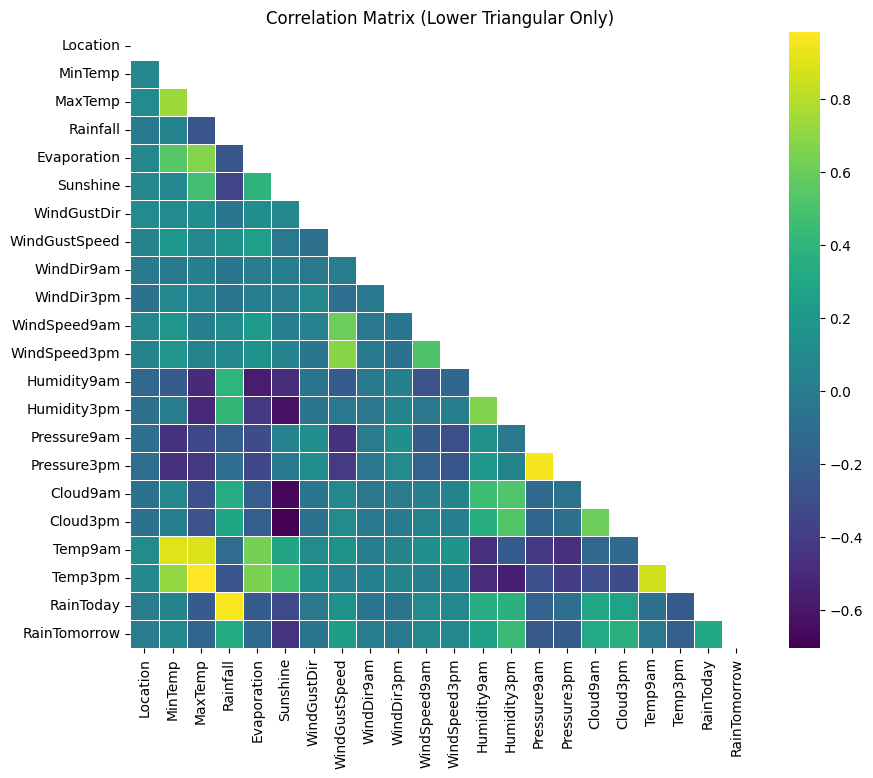

In [ ]:
# Calculate correlation matrix
correlation_matrix = rain.corr(numeric_only=True)

# Create a mask for upper triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set upper triangular part to NaN
correlation_matrix[mask] = np.nan

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, linewidths=0.5, annot=False, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix (Lower Triangular Only)')
plt.show()

In [ ]:
# Calculate Pearson correlation coefficient
correlation_with_rain_tomorrow = rain.corrwith(rain['RainTomorrow'])

# Select only positively correlated features
positively_correlated_features = correlation_with_rain_tomorrow[correlation_with_rain_tomorrow > 0]

# Display the positively correlated features
print("Features positively correlated with RainTomorrow:")
print(positively_correlated_features)

Features positively correlated with RainTomorrow:
MinTemp          0.082458
Rainfall         0.329852
WindGustSpeed    0.227193
WindDir9am       0.007337
WindSpeed9am     0.085341
WindSpeed3pm     0.081977
Humidity9am      0.254437
Humidity3pm      0.439929
Cloud9am         0.313025
Cloud3pm         0.377607
RainToday        0.305744
RainTomorrow     1.000000
dtype: float64


In [ ]:

# Select only negatively correlated features
negatively_correlated_features = correlation_with_rain_tomorrow[correlation_with_rain_tomorrow < 0]

# Display the negatively correlated features
print("Features negatively correlated with RainTomorrow:")
print(negatively_correlated_features)

Features negatively correlated with RainTomorrow:
Location      -0.007443
MaxTemp       -0.156946
Evaporation   -0.132703
Sunshine      -0.443561
WindGustDir   -0.056856
WindDir3pm    -0.013087
Pressure9am   -0.241871
Pressure3pm   -0.221884
Temp9am       -0.025590
Temp3pm       -0.190000
dtype: float64


In [ ]:
# 2. Fill missing numerical values with the median
rain_median_filled = rain.copy()
for feature in numerical_features:
    median_value = rain_median_filled[feature].median()
    rain_median_filled[feature].fillna(median_value, inplace=True)

In [ ]:
# 3. Use MICE (Multiple Imputation by Chained Equations) imputation
imputer_mice = IterativeImputer(random_state=0)
rain_mice_filled = rain.copy()
rain_mice_filled[numerical_features] = imputer_mice.fit_transform(rain_mice_filled[numerical_features])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
X = rain_mean_filled.drop(['RainTomorrow'], axis=1)
y = rain_mean_filled['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=0)  # Example: Linear kernel

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.843152756771621


In [ ]:
X = rain_mice_filled.drop(['RainTomorrow'], axis=1)
y = rain_mice_filled['RainTomorrow']

In [ ]:
X = rain_mice_filled.drop(['RainTomorrow'], axis=1)
y = rain_mice_filled['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=0)  # Example: Linear kernel

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8584834318713048


In [ ]:
X = rain_median_filled.drop(['RainTomorrow'], axis=1)
y = rain_median_filled['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=0)  # Example: Linear kernel

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8432215041935928


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


In [ ]:
X = rain_mice_filled.drop(['RainTomorrow'], axis=1)
# Assign the target variable 'RainTomorrow' to y
y = rain_mice_filled['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
#ReLU(x) = max(0, x)
#sigmoid(x) = 1 / (1 + exp(-x))
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on the testing set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
#Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)
accuracy_ann = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_ann)

# Calculate precision
#Precision = (True Positives) / (True Positives + False Positives)
precision_ann = precision_score(y_test, y_pred)
print("Precision:", precision_ann)

# Calculate recall
#Recall = (True Positives) / (True Positives + False Negatives)
recall_ann = recall_score(y_test, y_pred)
print("Recall:", recall_ann)

# Calculate F1 score
#F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

f1_ann = f1_score(y_test, y_pred)
print("F1 Score:", f1_ann)

Epoch 1/10
3637/3637 [==============================] - 10s 2ms/step - loss: 0.3280 - accuracy: 0.8576
Epoch 2/10
3637/3637 [==============================] - 7s 2ms/step - loss: 0.3041 - accuracy: 0.8695
Epoch 3/10
3637/3637 [==============================] - 8s 2ms/step - loss: 0.2538 - accuracy: 0.8970
Epoch 4/10
3637/3637 [==============================] - 8s 2ms/step - loss: 0.2258 - accuracy: 0.9094
Epoch 5/10
3637/3637 [==============================] - 8s 2ms/step - loss: 0.2150 - accuracy: 0.9117
Epoch 6/10
3637/3637 [==============================] - 9s 2ms/step - loss: 0.2083 - accuracy: 0.9147
Epoch 7/10
3637/3637 [==============================] - 7s 2ms/step - loss: 0.2034 - accuracy: 0.9162
Epoch 8/10
3637/3637 [==============================] - 9s 2ms/step - loss: 0.2002 - accuracy: 0.9174
Epoch 9/10
3637/3637 [==============================] - 7s 2ms/step - loss: 0.1968 - accuracy: 0.9183
Epoch 10/10
910/910 [==============================] - 1s 1ms/step
Accuracy: 0.91

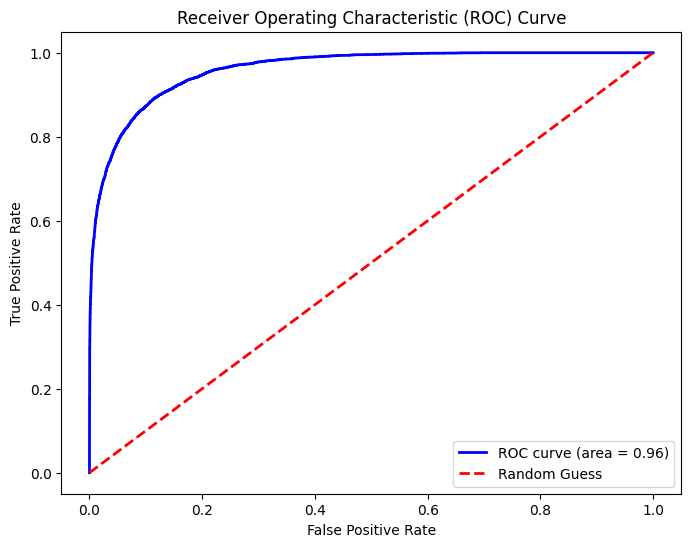

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the ANN model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize a list to store cross-validation scores
cv_scores = []

# Perform K-Fold cross-validation
for train_index, test_index in kfold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and compile the model
    model = create_model()

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

910/910 [==============================] - 2s 2ms/step
Cross-validation scores: [0.9145469544892066, 0.91468444933315, 0.9144094596452633, 0.9142375910903341, 0.91509693386498]
Mean accuracy: 0.9145950776845867


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN input (assuming X has 2D shape)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the RNN model
model = Sequential([
    SimpleRNN(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on the testing set
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy_rnn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rnn)
# Calculate precision
precision_rnn = precision_score(y_test, y_pred)
print("Precision:", precision_rnn)

# Calculate recall
recall_rnn = recall_score(y_test, y_pred)
print("Recall:", recall_rnn)

# Calculate F1 score
f1_rnn = f1_score(y_test, y_pred)
print("F1 Score:", f1_rnn)

Epoch 1/10
3637/3637 [==============================] - 31s 8ms/step - loss: 0.3460 - accuracy: 0.8491
Epoch 2/10
3637/3637 [==============================] - 22s 6ms/step - loss: 0.3282 - accuracy: 0.8587
Epoch 3/10
3637/3637 [==============================] - 23s 6ms/step - loss: 0.3210 - accuracy: 0.8619
Epoch 4/10
3637/3637 [==============================] - 24s 7ms/step - loss: 0.3148 - accuracy: 0.8649
Epoch 5/10
3637/3637 [==============================] - 23s 6ms/step - loss: 0.3093 - accuracy: 0.8674
Epoch 6/10
3637/3637 [==============================] - 23s 6ms/step - loss: 0.3051 - accuracy: 0.8694
Epoch 7/10
3637/3637 [==============================] - 25s 7ms/step - loss: 0.3031 - accuracy: 0.8709
Epoch 8/10
3637/3637 [==============================] - 25s 7ms/step - loss: 0.2995 - accuracy: 0.8724
Epoch 9/10
3637/3637 [==============================] - 24s 7ms/step - loss: 0.2973 - accuracy: 0.8727
Epoch 10/10
910/910 [==============================] - 3s 3ms/step
Accura

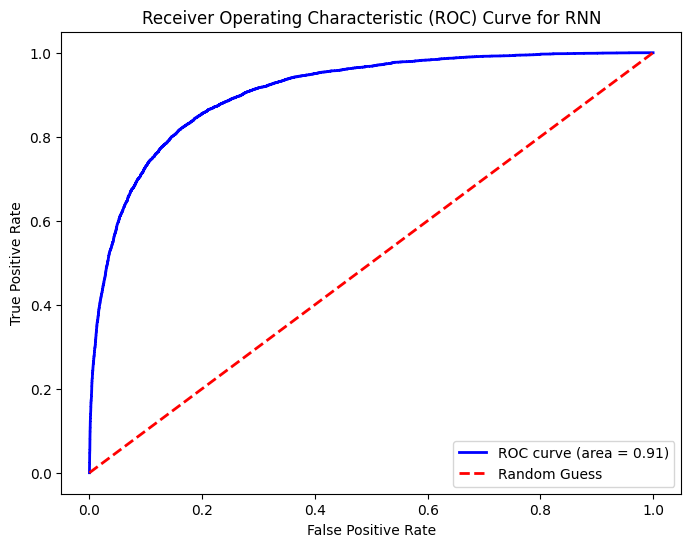

In [ ]:

# Calculate the ROC curve
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc_rnn = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rnn, tpr_rnn, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rnn))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RNN')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Define number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for RNN input (assuming X has 2D shape)
X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Perform cross-validation
for train_index, test_index in kf.split(X_reshaped):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define the RNN model
    model = Sequential([
        SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict on the testing set
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Evaluate the model and append the accuracy to the list of scores
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))


910/910 [==============================] - 3s 3ms/step
Cross-validation scores: [0.870754846693249, 0.8718548054447958, 0.8719579265777533, 0.8695517668087447, 0.8750171868554929]
Mean accuracy: 0.8718273064760071


In [ ]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for GRU input (assuming X has 2D shape)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the GRU model
model = Sequential([
    GRU(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on the testing set
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy_gru = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_gru)

# Calculate precision
precision_gru = precision_score(y_test, y_pred)
print("Precision:", precision_gru)

# Calculate recall
recall_gru = recall_score(y_test, y_pred)
print("Recall:", recall_gru)

# Calculate F1 score
f1_gru = f1_score(y_test, y_pred)
print("F1 Score:", f1_gru)


Epoch 1/10
3637/3637 [==============================] - 58s 15ms/step - loss: 0.3712 - accuracy: 0.8391
Epoch 2/10
3637/3637 [==============================] - 48s 13ms/step - loss: 0.3550 - accuracy: 0.8464
Epoch 3/10
3637/3637 [==============================] - 48s 13ms/step - loss: 0.3465 - accuracy: 0.8508
Epoch 4/10
3637/3637 [==============================] - 46s 13ms/step - loss: 0.3370 - accuracy: 0.8554
Epoch 5/10
3637/3637 [==============================] - 46s 13ms/step - loss: 0.3289 - accuracy: 0.8587
Epoch 6/10
3637/3637 [==============================] - 51s 14ms/step - loss: 0.3219 - accuracy: 0.8620
Epoch 7/10
3637/3637 [==============================] - 47s 13ms/step - loss: 0.3137 - accuracy: 0.8663
Epoch 8/10
3637/3637 [==============================] - 48s 13ms/step - loss: 0.3050 - accuracy: 0.8709
Epoch 9/10
3637/3637 [==============================] - 48s 13ms/step - loss: 0.2956 - accuracy: 0.8752
Epoch 10/10
910/910 [==============================] - 4s 4ms/st

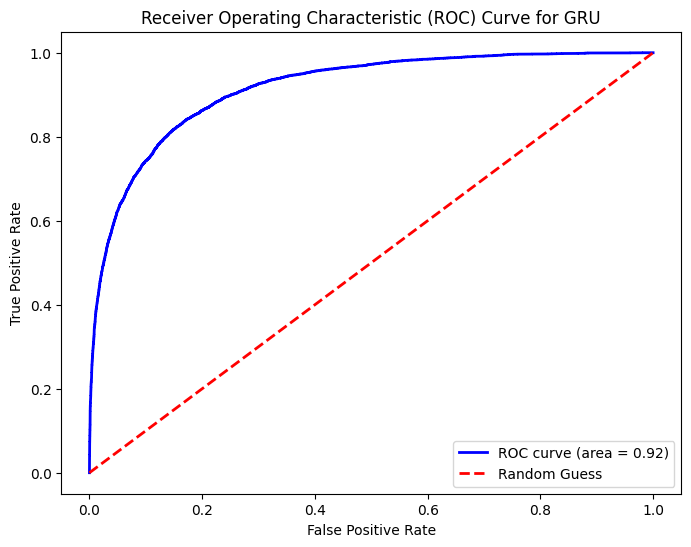

In [ ]:
# Calculate the ROC curve
fpr_gru, tpr_gru, thresholds_gru = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc_gru = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gru, tpr_gru, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_gru))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GRU')
plt.legend(loc='lower right')
plt.show()

In [ ]:


# Define number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for GRU input (assuming X has 2D shape)
X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Perform cross-validation
for train_index, test_index in kf.split(X_reshaped):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define the GRU model
    model = Sequential([
        GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict on the testing set
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Evaluate the model and append the accuracy to the list of scores
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))


910/910 [==============================] - 4s 4ms/step
Cross-validation scores: [0.8822012924515331, 0.8741234703698612, 0.8796232641275952, 0.8683486869242404, 0.8719579265777533]
Mean accuracy: 0.8752509280901967


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM input (assuming X has 2D shape)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)
# Predict on the testing set
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy_lstm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_lstm)
# Calculate precision
precision_lstm = precision_score(y_test, y_pred)
print("Precision:", precision_lstm)

# Calculate recall
recall_lstm = recall_score(y_test, y_pred)
print("Recall:", recall_lstm)

# Calculate F1 score
f1_lstm = f1_score(y_test, y_pred)
print("F1 Score:", f1_lstm)



Epoch 1/10
3637/3637 [==============================] - 43s 11ms/step - loss: 0.4040 - accuracy: 0.8243
Epoch 2/10
3637/3637 [==============================] - 43s 12ms/step - loss: 0.3552 - accuracy: 0.8459
Epoch 3/10
3637/3637 [==============================] - 41s 11ms/step - loss: 0.3451 - accuracy: 0.8494
Epoch 4/10
3637/3637 [==============================] - 41s 11ms/step - loss: 0.3332 - accuracy: 0.8559
Epoch 5/10
3637/3637 [==============================] - 40s 11ms/step - loss: 0.3264 - accuracy: 0.8594
Epoch 6/10
3637/3637 [==============================] - 41s 11ms/step - loss: 0.3211 - accuracy: 0.8619
Epoch 7/10
3637/3637 [==============================] - 41s 11ms/step - loss: 0.3156 - accuracy: 0.8651
Epoch 8/10
3637/3637 [==============================] - 40s 11ms/step - loss: 0.3077 - accuracy: 0.8689
Epoch 9/10
3637/3637 [==============================] - 40s 11ms/step - loss: 0.2998 - accuracy: 0.8721
Epoch 10/10
910/910 [==============================] - 4s 4ms/st

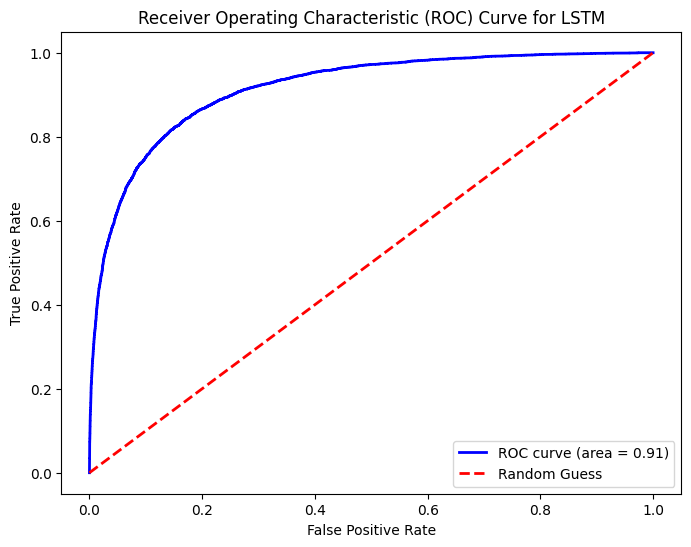

In [ ]:
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc_lstm = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lstm))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LSTM')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Define number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM input (assuming X has 2D shape)
X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

# Perform cross-validation
for train_index, test_index in kf.split(X_reshaped):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define the LSTM model
    model = Sequential([
        LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict on the testing set
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Evaluate the model and append the accuracy to the list of scores
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

910/910 [==============================] - 2s 2ms/step
Cross-validation scores: [0.8771483569366149, 0.8744328337687337, 0.8791076584628077, 0.8736078647050736, 0.8792107795957652]
Mean accuracy: 0.8767014986937991


In [ ]:

# Define the evaluation results from the previously calculated code
evaluation_results = [
    {"Model": "ANN", "Accuracy": accuracy_ann, "Precision": precision_ann, "Recall": recall_ann, "F1 Score": f1_ann},
    {"Model": "RNN", "Accuracy": accuracy_rnn, "Precision": precision_rnn, "Recall": recall_rnn, "F1 Score": f1_rnn},
    {"Model": "GRU", "Accuracy": accuracy_gru, "Precision": precision_gru, "Recall": recall_gru, "F1 Score": f1_gru},
    {"Model": "LSTM", "Accuracy": accuracy_lstm, "Precision": precision_lstm, "Recall": recall_lstm, "F1 Score": f1_lstm}
]

# Create a DataFrame from the evaluation results
df = pd.DataFrame(evaluation_results)

# Display the comparison table
print(df)

  Model  Accuracy  Precision    Recall  F1 Score
0   ANN  0.913275   0.870874  0.708765  0.781502
1   RNN  0.871339   0.744364  0.627553  0.680985
2   GRU  0.877286   0.746387  0.665253  0.703488
3  LSTM  0.881273   0.765596  0.659284  0.708474


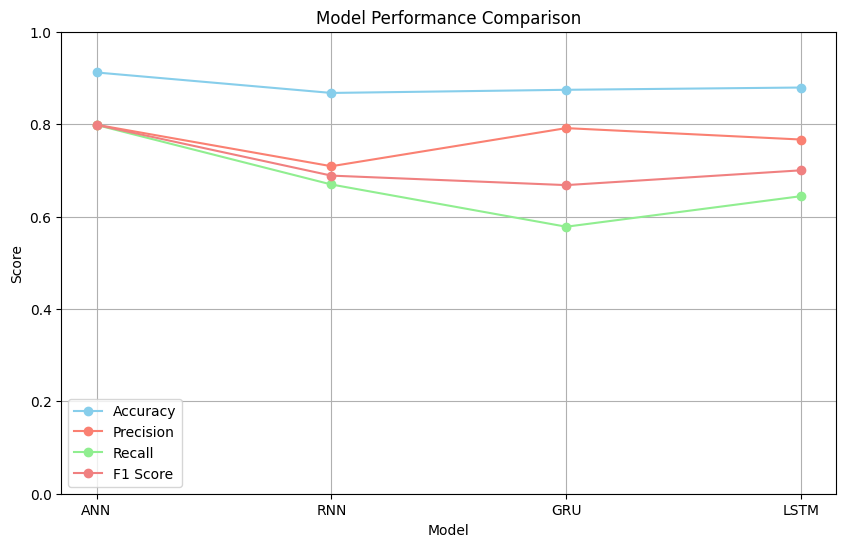

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding metrics
models = ['ANN', 'RNN', 'GRU', 'LSTM']
accuracy = [accuracy_ann, accuracy_rnn, accuracy_gru, accuracy_lstm]
precision = [precision_ann, precision_rnn, precision_gru, precision_lstm]
recall = [recall_ann, recall_rnn, recall_gru, recall_lstm]
f1_score = [f1_ann, f1_rnn, f1_gru, f1_lstm]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot all metrics on the same graph
ax.plot(models, accuracy, marker='o', linestyle='-', color='skyblue', label='Accuracy')
ax.plot(models, precision, marker='o', linestyle='-', color='salmon', label='Precision')
ax.plot(models, recall, marker='o', linestyle='-', color='lightgreen', label='Recall')
ax.plot(models, f1_score, marker='o', linestyle='-', color='lightcoral', label='F1 Score')

# Set axis labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_ylim(0, 1)

# Add a legend
ax.legend()

# Show plot
plt.grid(True)
plt.show()



In [ ]:
"""from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model with dropout regularization
model = Sequential([
    LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
accuracy = model.evaluate(X_test_reshaped, y_test)[1]
print("Accuracy:", accuracy)"""

Epoch 1/50
2910/2910 [==============================] - 82s 27ms/step - loss: 0.4373 - accuracy: 0.8081 - val_loss: 0.3871 - val_accuracy: 0.8270
Epoch 2/50
2910/2910 [==============================] - 77s 26ms/step - loss: 0.3848 - accuracy: 0.8315 - val_loss: 0.3666 - val_accuracy: 0.8403
Epoch 3/50
2910/2910 [==============================] - 78s 27ms/step - loss: 0.3730 - accuracy: 0.8364 - val_loss: 0.3585 - val_accuracy: 0.8435
Epoch 4/50
2910/2910 [==============================] - 80s 27ms/step - loss: 0.3656 - accuracy: 0.8395 - val_loss: 0.3482 - val_accuracy: 0.8496
Epoch 5/50
2910/2910 [==============================] - 76s 26ms/step - loss: 0.3601 - accuracy: 0.8435 - val_loss: 0.3456 - val_accuracy: 0.8467
Epoch 6/50
2910/2910 [==============================] - 79s 27ms/step - loss: 0.3571 - accuracy: 0.8448 - val_loss: 0.3368 - val_accuracy: 0.8541
Epoch 7/50
2910/2910 [==============================] - 76s 26ms/step - loss: 0.3529 - accuracy: 0.8467 - val_loss: 0.3323 -

In [ ]:

"""# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM input (assuming X has 2D shape)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Train base models
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(64, activation='relu')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=0)

gru_model = Sequential([
    GRU(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(64, activation='relu')
])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=0)

ann_model = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu')
])
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

rnn_model = Sequential([
    SimpleRNN(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(64, activation='relu')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=0)

# Generate predictions from base models
lstm_preds = lstm_model.predict(X_test_reshaped)
gru_preds = gru_model.predict(X_test_reshaped)
ann_preds = ann_model.predict(X_test_scaled)
rnn_preds = rnn_model.predict(X_test_reshaped)

# Combine predictions as features
stacked_X_test = np.concatenate((lstm_preds, gru_preds, ann_preds, rnn_preds), axis=1)

# Train meta-learner
meta_learner = Sequential([
    Dense(64, input_shape=(stacked_X_test.shape[1],), activation='relu'),
    Dense(1, activation='sigmoid')
])
meta_learner.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
meta_learner.fit(stacked_X_test, y_test, epochs=10, batch_size=32, verbose=0)

# Generate predictions from base models for training set
lstm_train_preds = lstm_model.predict(X_train_reshaped)
gru_train_preds = gru_model.predict(X_train_reshaped)
ann_train_preds = ann_model.predict(X_train_scaled)
rnn_train_preds = rnn_model.predict(X_train_reshaped)

# Combine predictions as features for training set
stacked_X_train = np.concatenate((lstm_train_preds, gru_train_preds, ann_train_preds, rnn_train_preds), axis=1)

# Generate predictions from base models for testing set
ensemble_train_preds = meta_learner.predict(stacked_X_train)
ensemble_train_preds = (ensemble_train_preds > 0.5).astype(int)

ensemble_test_preds = meta_learner.predict(stacked_X_test)
ensemble_test_preds = (ensemble_test_preds > 0.5).astype(int)

# Evaluate ensemble model
train_accuracy = accuracy_score(y_train, ensemble_train_preds)
test_accuracy = accuracy_score(y_test, ensemble_test_preds)

# Calculate precision, recall, and F1-score for training set
precision_train = precision_score(y_train, ensemble_train_preds)
recall_train = recall_score(y_train, ensemble_train_preds)
f1_train = f1_score(y_train, ensemble_train_preds)

# Calculate precision, recall, and F1-score for testing set
precision_test = precision_score(y_test, ensemble_test_preds)
recall_test = recall_score(y_test, ensemble_test_preds)
f1_test = f1_score(y_test, ensemble_test_preds)

# Print evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training Precision:", precision_train)
print("Testing Precision:", precision_test)
print("Training Recall:", recall_train)
print("Testing Recall:", recall_test)
print("Training F1-score:", f1_train)
print("Testing F1-score:", f1_test)"""


910/910 [==============================] - 1s 2ms/step
Training Accuracy: 0.8569108345937028
Testing Accuracy: 0.8578990787845456
Training Precision: 0.748040313549832
Testing Precision: 0.7528318985047576
Training Recall: 0.5236956606953863
Testing Recall: 0.5219918316054037
Training F1-score: 0.616079869036914
Testing F1-score: 0.6165120593692023


In [ ]:

# Adjust this based on your actual dataset
X = rain_mice_filled.drop(['Rainfall'], axis=1)  # Features
y = rain_mice_filled['Rainfall']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model1= Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer with 64 neurons and ReLU activation
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer; no activation function as we're predicting a continuous value
])

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error loss function for regression

# Train the model
model1.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the testing set
y_pred = model1.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)
mse_ann = mean_squared_error(y_test, y_pred)
#MSE = (1/n) * Σ(actual - predicted)^2
mae_ann = mean_absolute_error(y_test, y_pred)
#MAE = (1/n) * Σ|actual - predicted|
rmse_ann = np.sqrt(mse_ann)
#RMSE = sqrt(MSE)

print("Mean Squared Error (MSE):", mse_ann)
print("Mean Absolute Error (MAE):", mae_ann)
print("Root Mean Squared Error (RMSE):", rmse_ann)



Epoch 1/10
2910/2910 [==============================] - 8s 2ms/step - loss: 0.0436 - val_loss: 0.0374
Epoch 2/10
2910/2910 [==============================] - 6s 2ms/step - loss: 0.0367 - val_loss: 0.0363
Epoch 3/10
2910/2910 [==============================] - 8s 3ms/step - loss: 0.0360 - val_loss: 0.0354
Epoch 4/10
2910/2910 [==============================] - 6s 2ms/step - loss: 0.0358 - val_loss: 0.0355
Epoch 5/10
2910/2910 [==============================] - 7s 2ms/step - loss: 0.0356 - val_loss: 0.0351
Epoch 6/10
2910/2910 [==============================] - 6s 2ms/step - loss: 0.0354 - val_loss: 0.0352
Epoch 7/10
2910/2910 [==============================] - 7s 2ms/step - loss: 0.0352 - val_loss: 0.0351
Epoch 8/10
2910/2910 [==============================] - 6s 2ms/step - loss: 0.0350 - val_loss: 0.0363
Epoch 9/10
2910/2910 [==============================] - 6s 2ms/step - loss: 0.0349 - val_loss: 0.0349
Epoch 10/10
910/910 [==============================] - 1s 1ms/step
Mean Squared Er

In [ ]:
k_folds = 5

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

mse_losses = []

model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model1.compile(optimizer='adam', loss='mean_squared_error')

for fold, (train_indices, val_indices) in enumerate(kf.split(X_train_scaled), 1):
    print(f'Fold {fold}/{k_folds}:')

    X_train_fold = X_train_scaled[train_indices]
    y_train_fold = y_train.iloc[train_indices]
    X_val_fold = X_train_scaled[val_indices]
    y_val_fold = y_train.iloc[val_indices]

    model1.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    mse_loss = model1.evaluate(X_val_fold, y_val_fold, verbose=0)

    print(f'Validation Loss: {mse_loss:.4f}')
    print('-' * 30)

    mse_losses.append(mse_loss)

mean_mse_loss = np.mean(mse_losses)
std_mse_loss = np.std(mse_losses)

print('Overall Results:')
print(f'Mean Loss (MSE): {mean_mse_loss:.4f} ± {std_mse_loss:.4f}')

Fold 1/5:
Validation Loss: 0.0344
------------------------------
Fold 2/5:
Validation Loss: 0.0349
------------------------------
Fold 3/5:
Validation Loss: 0.0274
------------------------------
Fold 4/5:
Validation Loss: 0.0276
------------------------------
Fold 5/5:
Validation Loss: 0.0254
------------------------------
Overall Results:
Mean Loss (MSE): 0.0299 ± 0.0039


In [ ]:
X = rain_mice_filled.drop(['Rainfall'], axis=1)  # Features
y = rain_mice_filled['Rainfall']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for RNN (assuming you want to use the time series)
# RNNs expect input data in the format (samples, time steps, features)
# Here, we assume each feature is a time step
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define the RNN model
model1 = Sequential([
    SimpleRNN(64,activation='relu',input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),  # RNN layer with 64 units
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer; no activation function as we're predicting a continuous value
])

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error loss function for regression

# Train the model
model1.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the testing set
y_pred = model1.predict(X_test_reshaped)

# Evaluate the model using Mean Squared Error (MSE)
mse_rnn = mean_squared_error(y_test, y_pred)
mae_rnn = mean_absolute_error(y_test, y_pred)
rmse_rnn = np.sqrt(mse_rnn)

print("Mean Squared Error (MSE):", mse_rnn)
print("Mean Absolute Error (MAE):", mae_rnn)
print("Root Mean Squared Error (RMSE):", rmse_rnn)


Epoch 1/10
2910/2910 [==============================] - 10s 3ms/step - loss: 0.0479 - val_loss: 0.0371
Epoch 2/10
2910/2910 [==============================] - 9s 3ms/step - loss: 0.0369 - val_loss: 0.0358
Epoch 3/10
2910/2910 [==============================] - 9s 3ms/step - loss: 0.0361 - val_loss: 0.0351
Epoch 4/10
2910/2910 [==============================] - 11s 4ms/step - loss: 0.0358 - val_loss: 0.0364
Epoch 5/10
2910/2910 [==============================] - 7s 2ms/step - loss: 0.0355 - val_loss: 0.0351
Epoch 6/10
2910/2910 [==============================] - 9s 3ms/step - loss: 0.0354 - val_loss: 0.0355
Epoch 7/10
2910/2910 [==============================] - 7s 2ms/step - loss: 0.0352 - val_loss: 0.0351
Epoch 8/10
2910/2910 [==============================] - 9s 3ms/step - loss: 0.0350 - val_loss: 0.0352
Epoch 9/10
2910/2910 [==============================] - 7s 3ms/step - loss: 0.0350 - val_loss: 0.0354
Epoch 10/10
910/910 [==============================] - 1s 1ms/step
Mean Squared 

In [ ]:
k_folds = 5

# Initialize a KFold instance
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
losses = []

# Define the RNN model
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer; no activation function as we're predicting a continuous value
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Iterate over each fold
for fold, (train_indices, val_indices) in enumerate(kf.split(X_train_reshaped), 1):
    print(f'Fold {fold}/{k_folds}:')

    # Split data into training and validation sets for this fold
    X_train_fold = X_train_reshaped[train_indices]
    y_train_fold = y_train.iloc[train_indices]
    X_val_fold = X_train_reshaped[val_indices]
    y_val_fold = y_train.iloc[val_indices]

    # Train the model on the training data for this fold
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the validation data for this fold
    loss = model.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Print the validation loss for this fold
    print(f'Validation Loss: {loss:.4f}')
    print('-' * 30)

    # Append the evaluation metric to the list
    losses.append(loss)

# Calculate the mean and standard deviation of losses across all folds
mean_loss = np.mean(losses)
std_loss = np.std(losses)

# Print the overall mean and standard deviation of losses
print('Overall Results:')
print(f'Mean Loss: {mean_loss:.4f} ± {std_loss:.4f}')


Fold 1/5:
Validation Loss: 0.0347
------------------------------
Fold 2/5:
Validation Loss: 0.0302
------------------------------
Fold 3/5:
Validation Loss: 0.0269
------------------------------
Fold 4/5:
Validation Loss: 0.0263
------------------------------
Fold 5/5:
Validation Loss: 0.0260
------------------------------
Overall Results:
Mean Loss: 0.0288 ± 0.0033


In [ ]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the training and testing data for GRU input
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define the GRU model
model1 = Sequential([
    GRU(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),  # GRU layer with 64 units
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer; no activation function as we're predicting a continuous value
])

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error loss function for regression

# Train the model
model1.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the testing set
y_pred = model1.predict(X_test_reshaped)

# Evaluate the model using Mean Squared Error (MSE)
mse_gru = mean_squared_error(y_test, y_pred)
mae_gru = mean_absolute_error(y_test, y_pred)  # Add mean_absolute_error
rmse_gru = np.sqrt(mse_gru)

print("Mean Squared Error (MSE):", mse_gru)
print("Mean Absolute Error (MAE):", mae_gru)
print("Root Mean Squared Error (RMSE):", rmse_gru)

Epoch 1/10
2910/2910 [==============================] - 12s 3ms/step - loss: 0.1029 - val_loss: 0.0988
Epoch 2/10
2910/2910 [==============================] - 10s 3ms/step - loss: 0.0915 - val_loss: 0.0837
Epoch 3/10
2910/2910 [==============================] - 9s 3ms/step - loss: 0.0768 - val_loss: 0.0725
Epoch 4/10
2910/2910 [==============================] - 10s 3ms/step - loss: 0.0690 - val_loss: 0.0671
Epoch 5/10
2910/2910 [==============================] - 10s 3ms/step - loss: 0.0656 - val_loss: 0.0648
Epoch 6/10
2910/2910 [==============================] - 9s 3ms/step - loss: 0.0638 - val_loss: 0.0649
Epoch 7/10
2910/2910 [==============================] - 10s 3ms/step - loss: 0.0626 - val_loss: 0.0636
Epoch 8/10
2910/2910 [==============================] - 10s 3ms/step - loss: 0.0618 - val_loss: 0.0623
Epoch 9/10
2910/2910 [==============================] - 10s 3ms/step - loss: 0.0611 - val_loss: 0.0632
Epoch 10/10
910/910 [==============================] - 2s 2ms/step
Mean Squ

In [ ]:

# Define the number of folds for cross-validation
k_folds = 5

# Initialize a KFold instance
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
losses = []

# Define the GRU model
model_gru = Sequential([
    GRU(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer; no activation function as we're predicting a continuous value
])

# Compile the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Iterate over each fold
for fold, (train_indices, val_indices) in enumerate(kf.split(X_train_reshaped), 1):
    print(f'Fold {fold}/{k_folds}:')

    # Split data into training and validation sets for this fold
    X_train_fold = X_train_reshaped[train_indices]
    y_train_fold = y_train.iloc[train_indices]
    X_val_fold = X_train_reshaped[val_indices]
    y_val_fold = y_train.iloc[val_indices]

    # Train the model on the training data for this fold
    model_gru.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the validation data for this fold
    loss = model_gru.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Print the validation loss for this fold
    print(f'Validation Loss: {loss:.4f}')
    print('-' * 30)

    # Append the evaluation metric to the list
    losses.append(loss)

# Calculate the mean and standard deviation of losses across all folds
mean_loss = np.mean(losses)
std_loss = np.std(losses)

# Print the overall mean and standard deviation of losses
print('Overall Results:')
print(f'Mean Loss: {mean_loss:.4f} ± {std_loss:.4f}')



Fold 1/5:
Validation Loss: 0.0622
------------------------------
Fold 2/5:
Validation Loss: 0.0617
------------------------------
Fold 3/5:
Validation Loss: 0.0573
------------------------------
Fold 4/5:
Validation Loss: 0.0529
------------------------------
Fold 5/5:
Validation Loss: 0.0523
------------------------------
Overall Results:
Mean Loss: 0.0573 ± 0.0042


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the training and testing data for LSTM input
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define the LSTM model
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),  # LSTM layer with 64 units
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer; no activation function as we're predicting a continuous value
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error loss function for regression

# Train the model
model_lstm.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the testing set
y_pred = model_lstm.predict(X_test_reshaped)

# Evaluate the model using Mean Squared Error (MSE)
mse_lstm = mean_squared_error(y_test, y_pred)
mae_lstm = mean_absolute_error(y_test, y_pred)  # Add mean_absolute_error
rmse_lstm = np.sqrt(mse_lstm)

print("Mean Squared Error (MSE):", mse_lstm)
print("Mean Absolute Error (MAE):", mae_lstm)
print("Root Mean Squared Error (RMSE):", rmse_lstm)


Epoch 1/10
2910/2910 [==============================] - 12s 4ms/step - loss: 0.1025 - val_loss: 0.0981
Epoch 2/10
2910/2910 [==============================] - 10s 3ms/step - loss: 0.0913 - val_loss: 0.0803
Epoch 3/10
2910/2910 [==============================] - 12s 4ms/step - loss: 0.0732 - val_loss: 0.0697
Epoch 4/10
2910/2910 [==============================] - 9s 3ms/step - loss: 0.0683 - val_loss: 0.0655
Epoch 5/10
2910/2910 [==============================] - 10s 4ms/step - loss: 0.0653 - val_loss: 0.0681
Epoch 6/10
2910/2910 [==============================] - 10s 4ms/step - loss: 0.0636 - val_loss: 0.0633
Epoch 7/10
2910/2910 [==============================] - 8s 3ms/step - loss: 0.0626 - val_loss: 0.0631
Epoch 8/10
2910/2910 [==============================] - 10s 3ms/step - loss: 0.0615 - val_loss: 0.0630
Epoch 9/10
2910/2910 [==============================] - 10s 3ms/step - loss: 0.0607 - val_loss: 0.0625
Epoch 10/10
910/910 [==============================] - 2s 2ms/step
Mean Squ

In [ ]:

# Define the number of folds for cross-validation
k_folds = 5

# Initialize a KFold instance
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
mse_losses = []

# Define the LSTM model
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer; no activation function as we're predicting a continuous value
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Iterate over each fold
for fold, (train_indices, val_indices) in enumerate(kf.split(X_train_reshaped), 1):
    print(f'Fold {fold}/{k_folds}:')

    # Split data into training and validation sets for this fold
    X_train_fold = X_train_reshaped[train_indices]
    y_train_fold = y_train.iloc[train_indices]
    X_val_fold = X_train_reshaped[val_indices]
    y_val_fold = y_train.iloc[val_indices]

    # Train the model on the training data for this fold
    model_lstm.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the validation data for this fold
    mse_loss = model_lstm.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Print the validation loss for this fold
    print(f'Validation Loss: {mse_loss:.4f}')
    print('-' * 30)

    # Append the evaluation metric to the list
    mse_losses.append(mse_loss)

# Calculate the mean and standard deviation of losses across all folds
mean_loss = np.mean(mse_losses)
std_loss = np.std(mse_losses)

# Print the overall mean and standard deviation of losses
print('Overall Results:')
print(f'Mean Loss (MSE): {mean_loss:.4f} ± {std_loss:.4f}')


Fold 1/5:
Validation Loss: 0.0617
------------------------------
Fold 2/5:
Validation Loss: 0.0602
------------------------------
Fold 3/5:
Validation Loss: 0.0579
------------------------------
Fold 4/5:
Validation Loss: 0.0543
------------------------------
Fold 5/5:
Validation Loss: 0.0532
------------------------------
Overall Results:
Mean Loss (MSE): 0.0575 ± 0.0033


In [ ]:
evaluation_results = {
    'Model': ['ANN', 'RNN', 'GRU', 'LSTM'],
    'MSE': [mse_ann, mse_rnn, mse_gru, mse_lstm],
    'MAE': [mae_ann, mae_rnn, mae_gru, mae_lstm],
    'RMSE': [rmse_ann, rmse_rnn, rmse_gru, rmse_lstm]
}

# Create a DataFrame from the evaluation results
df = pd.DataFrame(evaluation_results)

# Display the comparison table
print(df)

  Model       MSE       MAE      RMSE
0   ANN  0.034658  0.118908  0.186167
1   RNN  0.034731  0.102943  0.186363
2   GRU  0.063410  0.136910  0.251814
3  LSTM  0.063655  0.130150  0.252300


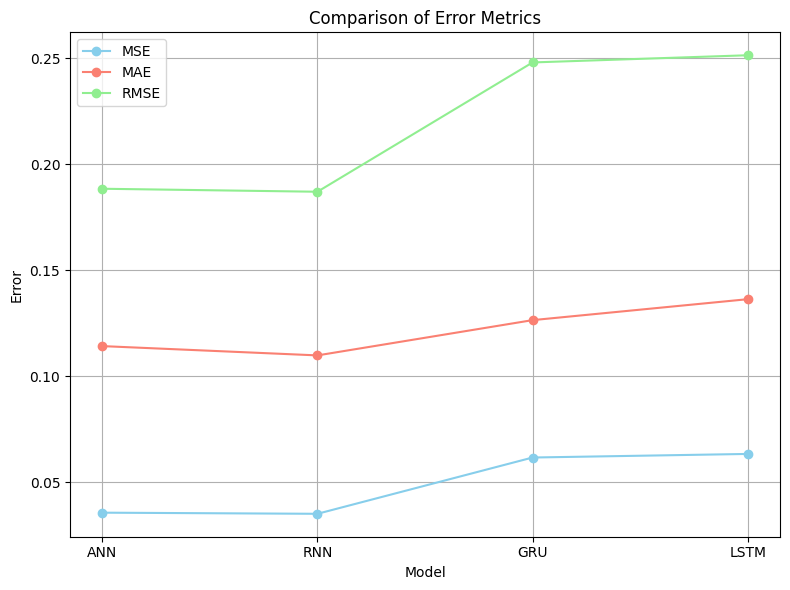

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding metrics
models = ['ANN', 'RNN', 'GRU', 'LSTM']
mse = [mse_ann, mse_rnn, mse_gru, mse_lstm]
mae = [mae_ann, mae_rnn, mae_gru, mae_lstm]
rmse = [rmse_ann, rmse_rnn, rmse_gru, rmse_lstm]

# Create a figure and axis
plt.figure(figsize=(8, 6))

# Plot MSE
plt.plot(models, mse, marker='o', linestyle='-', color='skyblue', label='MSE')

# Plot MAE
plt.plot(models, mae, marker='o', linestyle='-', color='salmon', label='MAE')

# Plot RMSE
plt.plot(models, rmse, marker='o', linestyle='-', color='lightgreen', label='RMSE')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Comparison of Error Metrics')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
"""import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.ensemble import RandomForestRegressor

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer with 64 neurons and ReLU activation
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer; no activation function as we're predicting a continuous value
])

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error loss function for regression

# Train the model
model1.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the testing set
y_pred1 = model1.predict(X_test_scaled)

# Make predictions using the ANN model
ann_predictions = ann_model.predict(X_test)

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define the RNN model
model1 = Sequential([
    SimpleRNN(64,activation='relu',input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),  # RNN layer with 64 units
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer; no activation function as we're predicting a continuous value
])

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error loss function for regression

# Train the model
model1.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the testing set
y_pred2 = model1.predict(X_test_reshaped)

# Combine predictions using a simple blending approach (e.g., averaging)
ensemble_predictions = (y_pred1+y_pred2) / 2

# Evaluate the ensemble model
mse = mean_squared_error(y_test, ensemble_predictions)
print("Mean Squared Error (MSE) - Ensemble:", mse)"""


Epoch 1/10
2910/2910 [==============================] - 11s 3ms/step - loss: 0.1069 - val_loss: 0.1027
Epoch 2/10
2910/2910 [==============================] - 7s 2ms/step - loss: 0.0974 - val_loss: 0.0949
Epoch 3/10
2910/2910 [==============================] - 9s 3ms/step - loss: 0.0847 - val_loss: 0.0783
Epoch 4/10
2910/2910 [==============================] - 7s 2ms/step - loss: 0.0718 - val_loss: 0.0741
Epoch 5/10
2910/2910 [==============================] - 8s 3ms/step - loss: 0.0680 - val_loss: 0.0696
Epoch 6/10
2910/2910 [==============================] - 12s 4ms/step - loss: 0.0656 - val_loss: 0.0664
Epoch 7/10
2910/2910 [==============================] - 7s 2ms/step - loss: 0.0643 - val_loss: 0.0695
Epoch 8/10
2910/2910 [==============================] - 8s 3ms/step - loss: 0.0633 - val_loss: 0.0645
Epoch 9/10
2910/2910 [==============================] - 7s 2ms/step - loss: 0.0626 - val_loss: 0.0654
Epoch 10/10
910/910 [==============================] - 1s 1ms/step
Epoch 1/10
29

In [ ]:
model.predict([[1,1.3,11.8,0,0,8,31,0,15,0,20,92,86,1016.9,1006.3,4,8,5,8.7,0,1]])

1/1 [==============================] - 0s 51ms/step


array([[1.]], dtype=float32)

In [ ]:
model.predict([[1,13.4,22.9,0.6,0,0,1,44,0,1,20,24,71,22,1007.7,1007.1,8,0,16.9,21.8,0]])

1/1 [==============================] - 0s 59ms/step


array([[0.]], dtype=float32)

In [ ]:
model1.predict([[1,1.3,0.2,11.8,0,0,8,31,0,15,0,20,92,86,1016.9,1006.3,4,8,5,8.7,0]])

1/1 [==============================] - 0s 55ms/step


array([[126.00102]], dtype=float32)

In [ ]:
# Assuming model.predict() returns probabilities for each class
# Replace 'predicted_probabilities' with the actual output of model.predict()
predicted_probabilities = model.predict([[1,13.4,22.9,0.6,0,0,1,44,0,1,20,24,71,22,1007.7,1007.1,8,0,16.9,21.8,0]])
print(predicted_probabilities[0][0])
# Check if the probability of rain is greater than or equal to 0.5
if predicted_probabilities[0][0] >= 0.5:
    print("There will be rain today. Please carry an umbrella")
    #print(model1.predict([[1,1.3,0,56,8,31,98,15,87,20,0,86,1016.9,1006.3,4,8,5,8.7,67,1,1]]))
else:
    print("There will be no rain today. Have a great day ahead")


1/1 [==============================] - 0s 36ms/step
0.0
There will be no rain today. Have a great day ahead


In [ ]:
# Assuming model.predict() returns probabilities for each class
# Replace 'predicted_probabilities' with the actual output of model.predict()
predicted_probabilities = model.predict([[1,1.3,11.8,0,0,8,31,0,15,0,20,92,86,1016.9,1006.3,4,8,5,8.7,0,1]])
print(predicted_probabilities[0][0])
# Check if the probability of rain is greater than or equal to 0.5
if predicted_probabilities[0][0] >= 0.5:
    print("There will be rain today. Please carry an umbrella")
    #print(model1.predict([[1,1.3,0,56,8,31,98,15,87,20,0,86,1016.9,1006.3,4,8,5,8.7,67,1,1]]))
else:
    print("There will be no rain today. Have a great day ahead")


1/1 [==============================] - 0s 71ms/step
1.0
There will be rain today. Please carry an umbrella


In [ ]:
model.save('annc.h5')

In [ ]:
model1.save('annp.h5')